In [1]:
import pandas as pd
df= pd.read_csv("fct_invoice.csv")
df.head()

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,05/08/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,09/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon


In [2]:
# easy 1.
unique_elements=len(df['customer_id'].unique())
print(unique_elements)

5191


In [3]:
#easy 2
unique_category=df['category'].unique()
print(unique_category)

numunique_category=len(df['category'].unique())
print(numunique_category)

['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
8


In [7]:
#easy 3
mostpop_payment=df['payment_method'].mode().values[0]
print(mostpop_payment)
popular_payment=df['payment_method'].value_counts().values[0]
print(popular_payment)

Cash
44447


In [89]:
#medium 1
df["total revenue"]=df["quantity"]*df["price"]

df.groupby('category')['total revenue'].sum().sort_values(ascending=False)[0:3]


category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: total revenue, dtype: float64

In [88]:
#medium 2
df2 = pd.read_json('dim_customer.json')
print(df2.head())

merged_df = pd.merge(df, df2, left_on='customer_id', right_on='id', how='left')
merged_df[merged_df['age']>45]['total revenue'].sum()

    age first_name gender  id last_name
0  48.0   Nicholas      M   0    Flores
1   NaN    Jeffery      M   1      Rowe
2  57.0     Alexis      F   2    Benton
3  73.0        Amy      F   3   Johnson
4  20.0      David      M   4     Moore


82039768.15

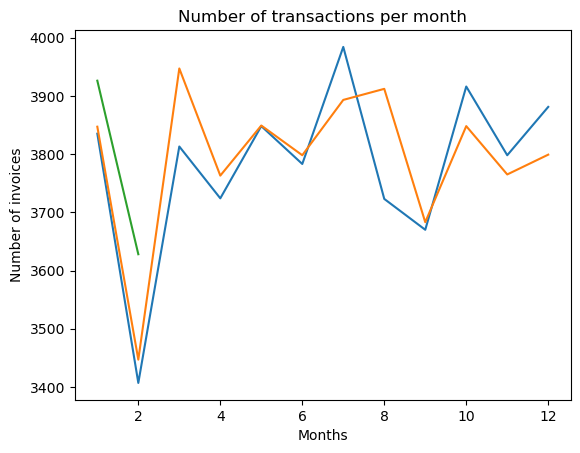

In [64]:
#medium 3
import matplotlib.pyplot as plt
df['date']= pd.to_datetime(df['invoice_date'], format="%d/%m/%Y")
df['month']= df['date'].dt.month
df['year']= df['date'].dt.year

for year in [2021,2022,2023]:
    lol_df= df[df['year']==year].copy()
    y= lol_df.groupby('month')['total revenue'].count()
    x= [i for i in range (1,13)]
    
    if year==2023:
        y=y[0:2]
        x=x[0:2]

    plt.plot(x,y)
    plt.title("Number of transactions per month")
    plt.ylabel("Number of invoices")
    plt.xlabel("Months")
    
plt.show()


    

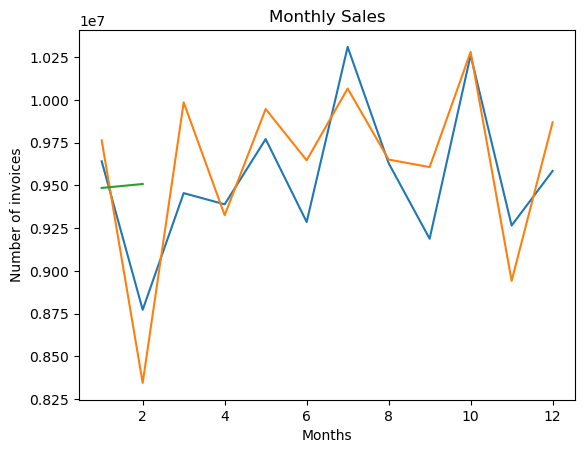

In [68]:
for year in [2021,2022,2023]:
    lol_df= df[df['year']==year].copy()
    y= lol_df.groupby('month')['total revenue'].sum()
    x= [i for i in range (1,13)]
    
    if year==2023:
        y=y[0:2]
        x=x[0:2]

    plt.plot(x,y)
    plt.title("Monthly Sales")
    plt.ylabel("Number of invoices")
    plt.xlabel("Months")
    
plt.show()

In [91]:
#hard
#totalrevenue
new_df=merged_df[['category', 'total revenue', 'age']]
new_df=new_df.dropna()
age_bins= [10,20,30,40,50,60,70,80,90]
age_labels=['10-19', '20-29','30-39','40-49','50-59','60-69','70-79','80-89']
new_df['Age Range'] = pd.cut(new_df['age'], bins=age_bins, labels=age_labels, right=False)

pivot_table = pd.pivot_table(new_df, values='total revenue', index=['category'], columns=['Age Range'], aggfunc='sum')

pivot_table


Age Range,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89
category,,,,,,,,
Books,12801.75,79461.75,84143.10,87203.40,74962.20,80476.80,54827.85,26664.00
Clothing,1927413.84,10250732.80,11354126.96,11215189.92,10321851.76,10660642.08,7769371.28,4493698.00
Cosmetics,109619.36,605915.32,723544.70,665034.96,587780.96,649990.76,419082.62,254531.60
Food & Beverage,13582.31,73491.96,87246.86,89553.29,72425.04,80976.09,55050.98,31332.93
Shoes,993281.35,5924878.24,7200839.66,7025590.02,5852857.84,5978893.54,4480269.05,2628744.60
Souvenir,12375.15,54943.32,64092.72,66391.80,54943.32,55025.43,38673.81,23718.06
Technology,1129800.00,5261550.00,6159300.00,5954550.00,4435200.00,5471550.00,3638250.00,1946700.00
Toys,60426.24,385100.80,420582.40,390906.88,345067.52,363955.20,273244.16,153932.80


In [90]:
#totalcount
new_df=merged_df[['category', 'total revenue', 'age']].copy()
new_df=new_df.dropna()
age_bins= [10,20,30,40,50,60,70,80,90]
age_labels=['10-19', '20-29','30-39','40-49','50-59','60-69','70-79','80-89' ]
new_df['Age Range'] = pd.cut(new_df['age'], bins=age_bins, labels=age_labels, right=False)

pivot_table = pd.pivot_table(new_df, values='total revenue', index=['category'], columns=['Age Range'], aggfunc='count')

pivot_table

Age Range,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89
category,,,,,,,,
Books,75,475,507,510,462,466,351,174
Clothing,563,3168,3389,3407,3085,3250,2349,1361
Cosmetics,235,1355,1636,1487,1329,1441,942,596
Food & Beverage,225,1342,1506,1567,1301,1430,951,555
Shoes,153,902,1022,1033,875,884,676,380
Souvenir,90,453,498,495,426,445,304,188
Technology,85,458,528,524,388,501,309,178
Toys,166,924,1076,1000,870,942,677,412
